
#Has COVID-19 led to an epidemic of commercial break and enters?

By: Kevin Liu, Rodrigo Samayoa, Zackarya Hamza

##Introduction

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Crime levels in a city or country are influenced by various social determinants, including income, inequality, and employment rates, among others (İmrohoroĝlu et al., 2006). Since the year 2000, Canada has seen a steady reduction in crime year after year (Jeudy, 2021). But the pandemic has caused major disruptions in the economy and the way people live, so it is important to ask, how has the pandemic affected crime in Vancouver?

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;On one hand, we could expect higher crime rates due to the increased joblessness, economic uncertainty and inequality (Statistics Canada, 2021). On the other, crime rates could have fallen as a result of the lockdowns that kept people at home and businesses closed. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This report will look specifically at commercial break and enters and investigate whether there has been an increase in this type of crime as a result of the pandemic. In the Spring of 2020, when the lockdowns started across Canada, there were reports that break and enters in commercial retail spaces increased during the lockdown as a result of stores being closed (Fitzpatrick, 2020). Now that we are more than a year into the pandemic we can look at the data and find out whether break-ins actually increased or if these were anecdotal reports. 

##Methods and Results

In [1]:
install.packages("infer")
library(broom)
library(tidyverse)
library(repr)
library(infer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘patchwork’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To answer this question, we will use the Vancouver Police Department’s (VPD) crime dataset, which compiles police reports from 2003 to present (Vancouver Police Department). To control for long term changes that can affect crime, we will only use crime data from 2015 onwards. Additionally, all crime entries from 2021 will not be included as the data for the year is incomplete. We will compare reported commercial break and enter data from the VPD in 2020 to the previous 5 years. This will allow us to compare similar years and control for factors like long term economic growth, cost of living, or cultural changes that can affect crime over the long term. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We will try to answer whether there was a significant increase in commercial break-ins over the previous year by comparing the proportion of reported break-ins over all other reported crimes for the periods from 2015-2019 against 2020.

In [2]:
crime_data = read_csv("https://raw.githubusercontent.com/jorosafi/crime-data/main/crime-data-2015-2021.csv") %>%
  filter(YEAR < 2021)
cat("Table 1: Crime entries from 2015 to 2020")
head(crime_data)

Rows: 275019 Columns: 8

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): TYPE, HUNDRED_BLOCK, NEIGHBOURHOOD
dbl (5): YEAR, MONTH, DAY, HOUR, MINUTE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Table 1: Crime entries from 2015 to 2020

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Theft from Vehicle,2020,1,13,3,0,8XX SEYMOUR ST,Central Business District
Theft from Vehicle,2020,1,18,14,0,8XX SEYMOUR ST,Central Business District
Theft from Vehicle,2020,1,23,5,7,8XX SEYMOUR ST,Central Business District
Theft from Vehicle,2020,2,2,14,30,8XX SEYMOUR ST,Central Business District
Theft from Vehicle,2020,3,24,14,45,8XX SEYMOUR ST,Central Business District
Theft from Vehicle,2020,7,2,12,0,8XX SEYMOUR ST,Central Business District


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We are focusing on the proportion of break-ins instead of the total count of the crimes to control for an overall dip in crime that happened in 2020. As seen in the graph below, according to the VPD’s data there was a significant decrease in overall crime in Vancouver in May 2020. By comparing the proportion of break and enter crimes, we can control for this overall drop in crimes and see whether a drop in overall crimes also meant a drop in break-ins.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



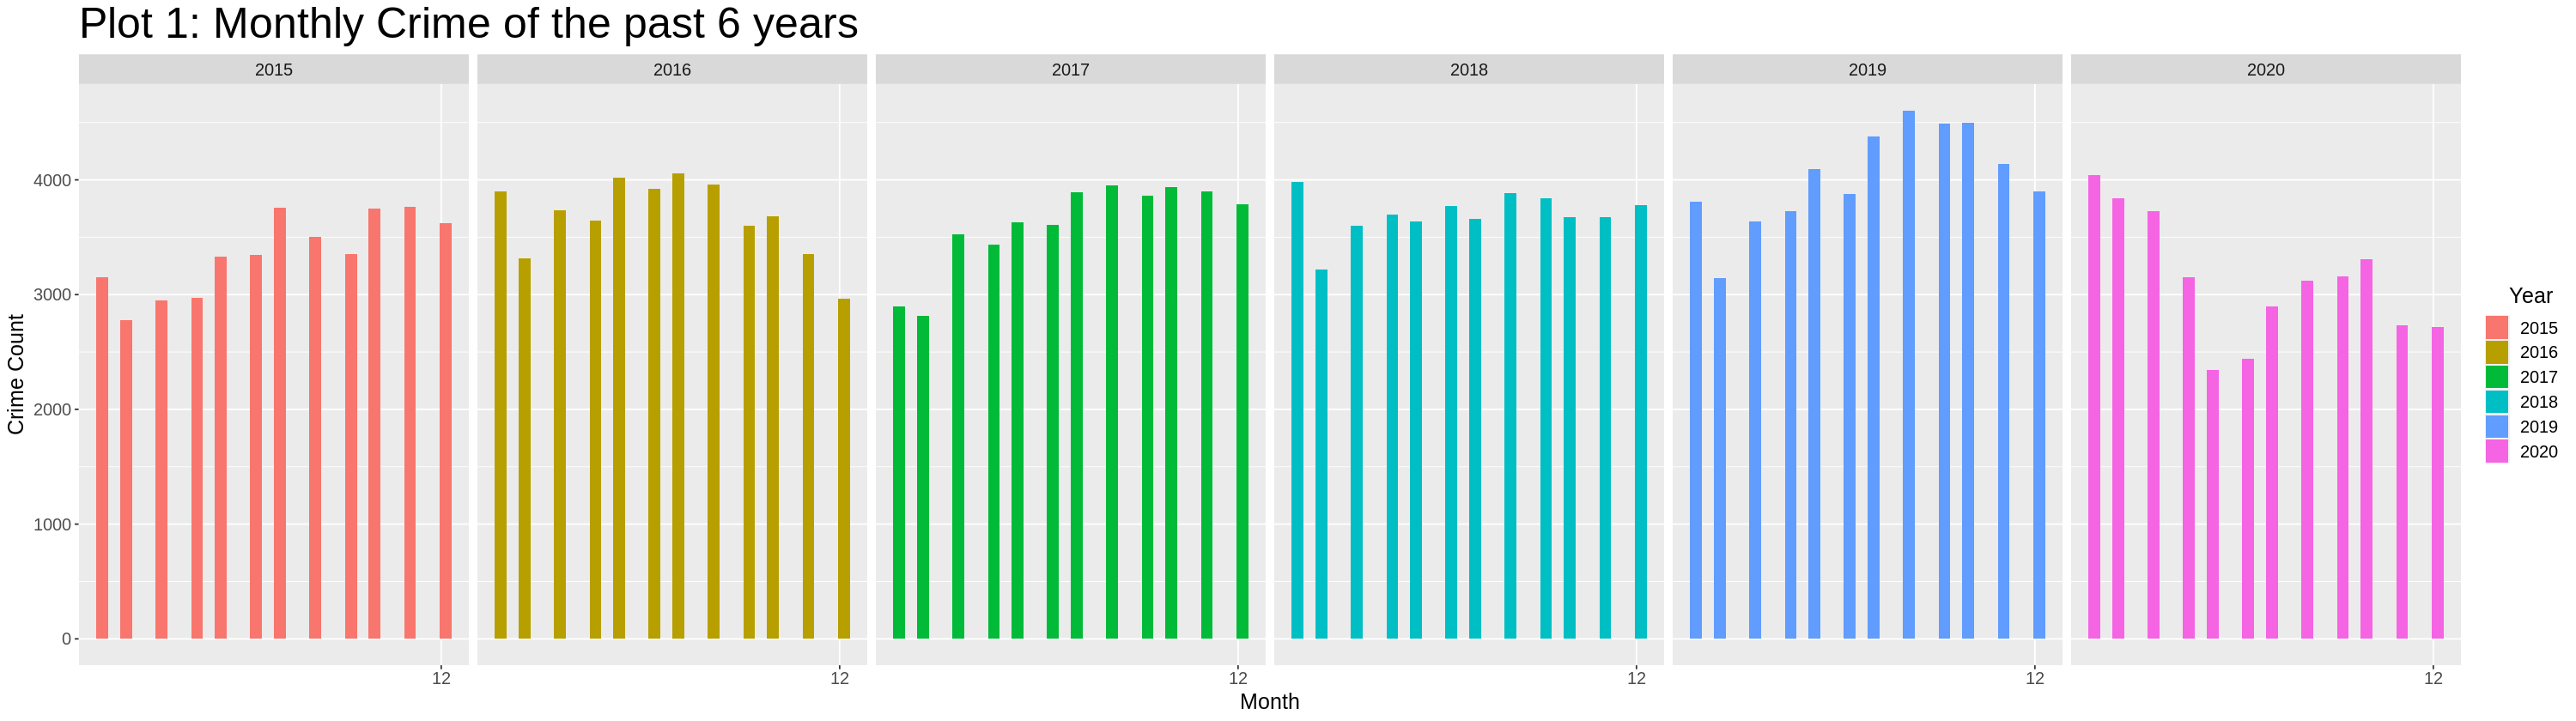

In [3]:
options(repr.plot.width = 25, repr.plot.height = 7)

visualisation = crime_data %>%
              summarise(MONTH  = as.integer(MONTH),
                        YEAR = as.integer(YEAR)) %>%
              group_by(YEAR, MONTH) %>%
                ggplot() +
                geom_histogram(aes(x = MONTH)) +
                scale_x_continuous(breaks = c(0, 12)) +
                facet_grid(~YEAR) +
                aes(fill = as.factor(YEAR)) +
                labs(x = "Month", y = "Crime Count", title = "Plot 1: Monthly Crime of the past 6 years", fill = "    Year") +
                theme(text=element_text(size=15),
                plot.title=element_text(size=30),)
visualisation

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When it comes to the total number of commercial break-ins over the period from 2015 to 2020, there does appear to be a slight increase in 2020 as seen in the graph below. While 2020 does have the highest number of break and enters in that period, it is not a significant difference and it is a comparable level to 2016. In fact, the mean count for 2015 to 2020 is 2,440 per year with a standard deviation of 289 crimes. 

mean,sd,min,max
<dbl>,<dbl>,<int>,<int>
2439.833,288.9023,2025,2788


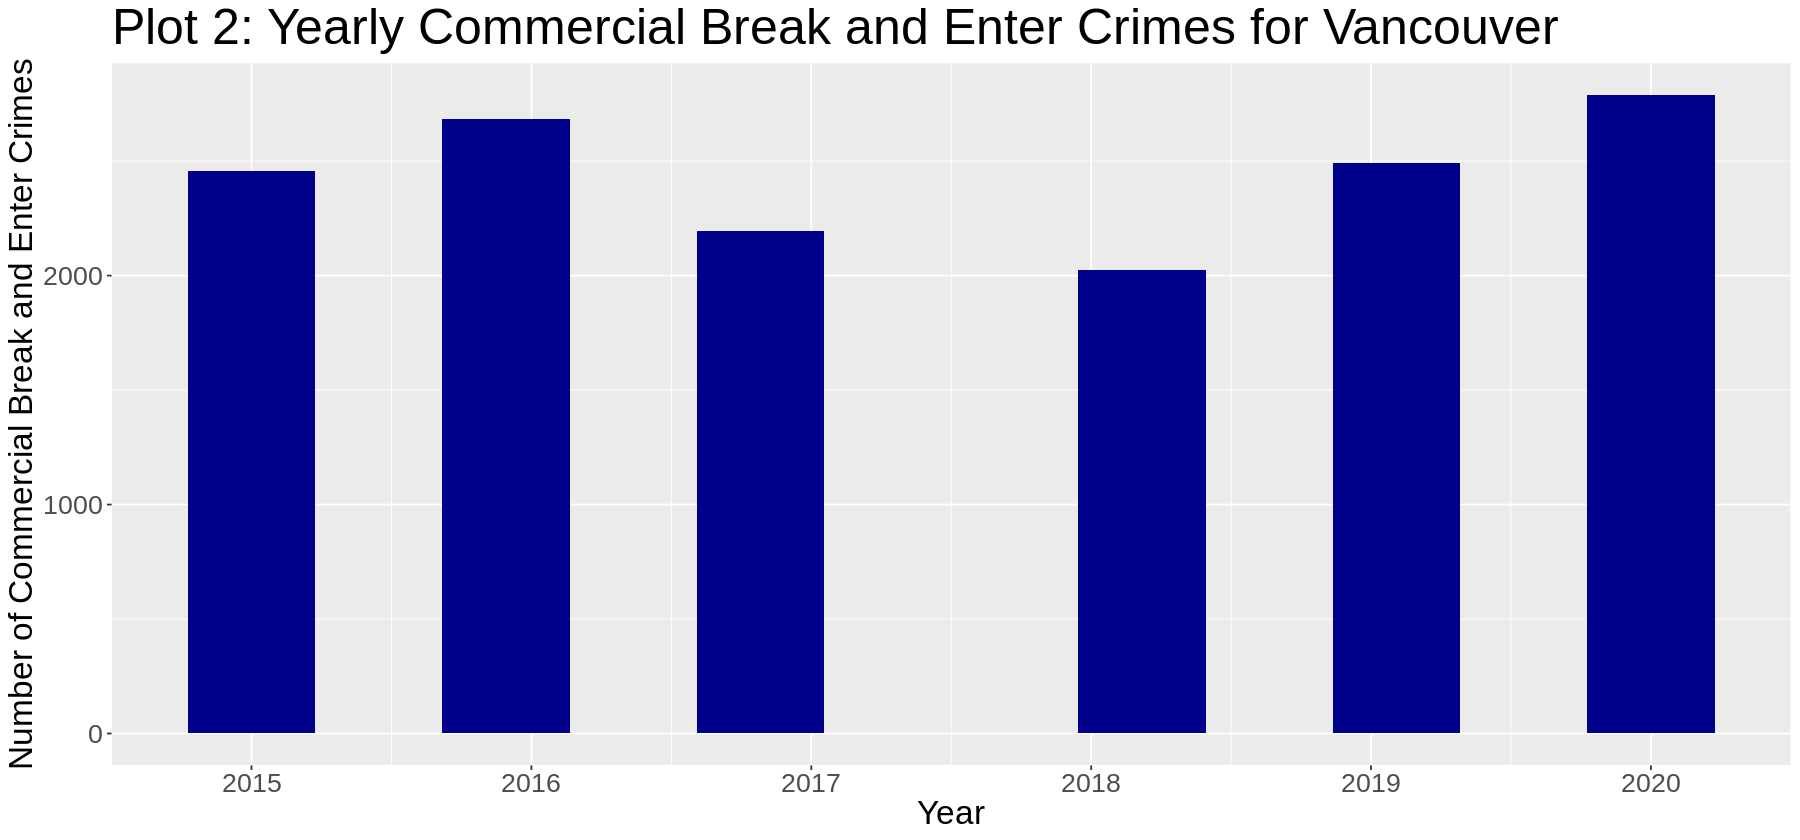

In [4]:
options(repr.plot.width = 15, repr.plot.height = 7)

BNEC_plot_all = crime_data %>%
                filter(TYPE == "Break and Enter Commercial") %>%
                ggplot() + 
                geom_histogram(aes(x = YEAR), bins = 12, fill = "dark blue") +
                scale_x_continuous(breaks = seq(2015, 2020, by = 1)) +
                labs(title = "Plot 2: Yearly Commercial Break and Enter Crimes for Vancouver",
                    x = "Year",
                    y = "Number of Commercial Break and Enter Crimes") +
              theme(text=element_text(size=20),
              plot.title=element_text(size=30),)

break_in_counts = crime_data %>%
  filter(TYPE == "Break and Enter Commercial") %>%
  group_by(YEAR) %>%
  summarise(count = n()) %>%
  summarise(mean = mean(count),
            sd = sd(count),
            min = min(count),
            max = max(count)) 

BNEC_plot_all
break_in_counts

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;When looking at the monthly data for 2020, it appears that most of the increase in commercial break-ins happens at the beginning of the lockdowns in March and April. It levels off during the summer and a second spike in break-ins happens in the fall. Both of these spikes in break-ins could be related to COVID-19 restrictions and business closures.

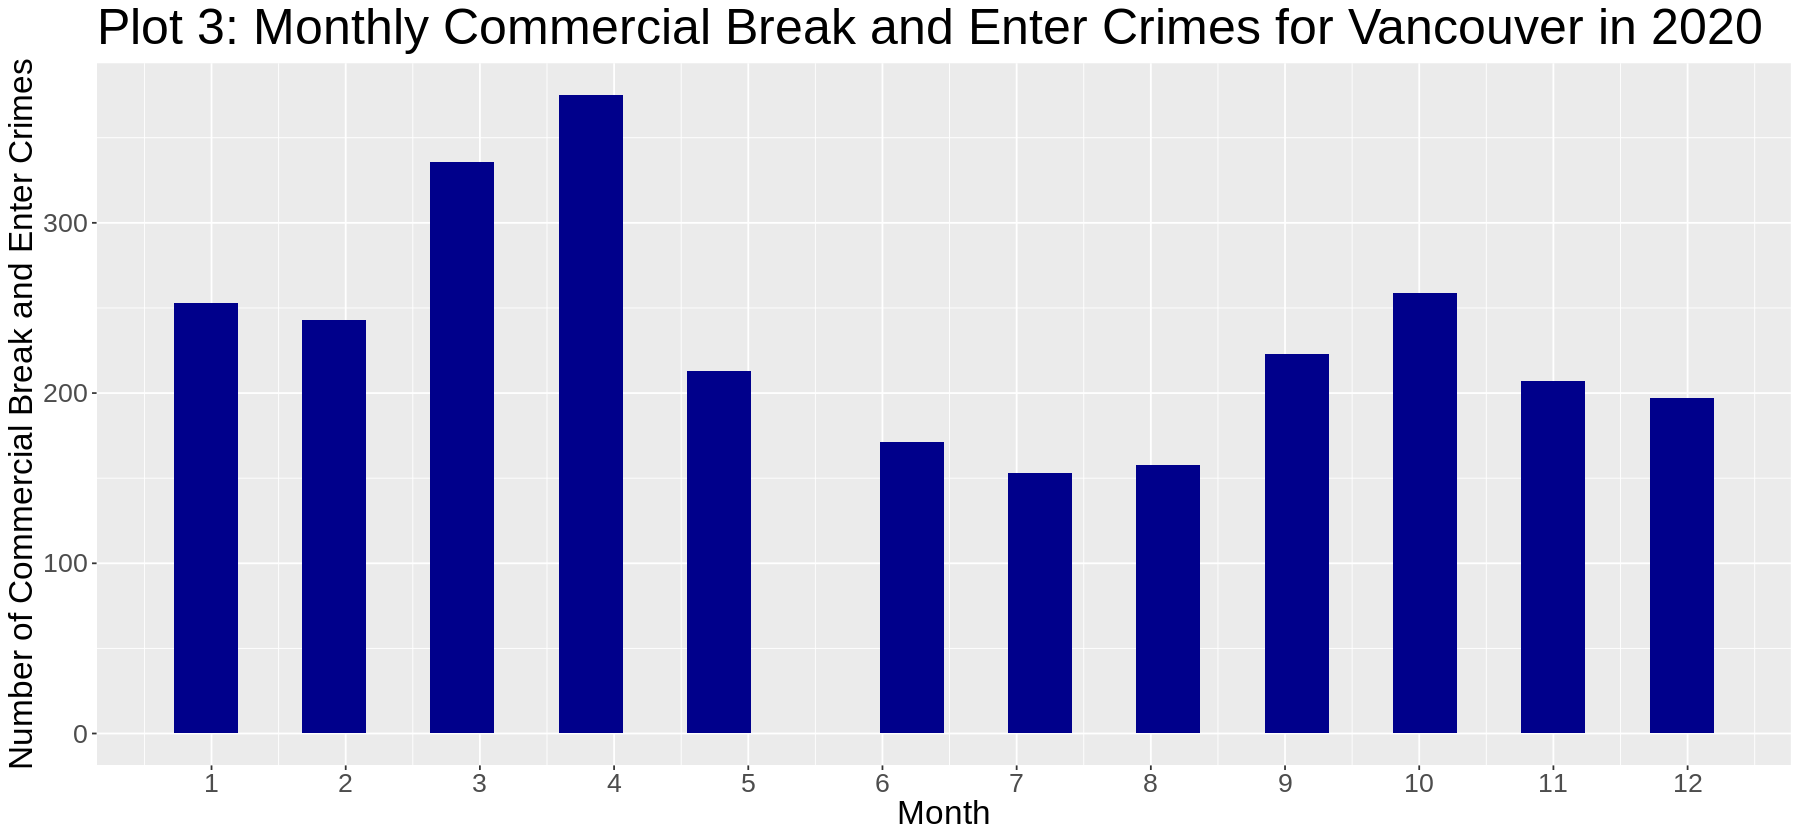

In [5]:
BNEC_plot_2020 = crime_data %>%
                filter(TYPE == "Break and Enter Commercial" & YEAR == 2020) %>%
                ggplot() + 
                geom_histogram(aes(x = MONTH), bins = 24, fill = "dark blue") +
                scale_x_continuous(breaks = seq(1, 12, by = 1)) +
                labs(title = "Plot 3: Monthly Commercial Break and Enter Crimes for Vancouver in 2020",
                    x = "Month",
                    y = "Number of Commercial Break and Enter Crimes") +
              theme(text=element_text(size=20),
              plot.title=element_text(size=30),)

BNEC_plot_2020

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;But when taking into account the overall drop in crime in 2020, can we say that the proportion of break and enters in 2020 is significantly higher than over the previous five years? 

###Hypothesis Testing

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The table below has all entries, where type has been changed to "Break and Enter Commerical" or "Other". There is also another column called "BEFORE_2020". This is to allow the hypothesis testing later on to be easier.

In [6]:
crime_data_2015_to_2019 = crime_data %>% 
                          filter(YEAR <= 2019) %>%
                          select(YEAR, TYPE) %>%
                          mutate(TYPE = ifelse(TYPE == "Break and Enter Commercial",
                                               "Break and Enter Commercial",
                                               "Other"),
                                 BEFORE_2020 = TRUE)

crime_data_2020 = crime_data %>%
                  filter(YEAR == 2020) %>%
                  select(YEAR, TYPE) %>%
                  mutate(TYPE = ifelse(TYPE == "Break and Enter Commercial",
                                      "Break and Enter Commercial",
                                      "Other"),
                         BEFORE_2020 = FALSE)
cat("Table 2: Crimes for 2015-2019")
head(crime_data_2015_to_2019)
cat("Table 3: Crimes for 2020")
head(crime_data_2020)

Table 2: Crimes for 2015-2019

YEAR,TYPE,BEFORE_2020
<dbl>,<chr>,<lgl>
2019,Other,TRUE
2019,Other,TRUE
2019,Other,TRUE
2019,Other,TRUE
2019,Other,TRUE
2019,Other,TRUE


Table 3: Crimes for 2020

YEAR,TYPE,BEFORE_2020
<dbl>,<chr>,<lgl>
2020,Other,FALSE
2020,Other,FALSE
2020,Other,FALSE
2020,Other,FALSE
2020,Other,FALSE
2020,Other,FALSE


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To investigate whether the difference in proportions is significant, we performed two hypothesis tests, a permutation test and a two sample test of proportions. Both tests are using a significance level of 0.01 to account for the large sample sizes. Our null hypothesis is that the proportion of break-ins over total crime in the 2015-19 period is equal to the proportion in 2020. The alternative hypothesis is that the proportion of break-ins in 2020 is higher than over the previous five years. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our preliminary results show that 2020 does indeed have a higher proportion of break and enters (0.0744, or 7.44%) than the previous 5 years (0.0538, or 5.38%).  The question is, is this a significant difference? 

In [7]:
crime_prop_2015_to_2019 = crime_data_2015_to_2019 %>%
                          group_by(TYPE) %>%
                          summarise(n = n(),
                                    prop = n/nrow(crime_data_2015_to_2019))

crime_prop_2020 = crime_data_2020 %>%
                  group_by(TYPE) %>%
                  summarise(n = n(),
                            prop = n/nrow(crime_data_2020))
                            
cat("Table 4: Crime count and proportion for 2015-2019")
crime_prop_2015_to_2019
cat("Table 5: Crime count and proportion for 2020")
crime_prop_2020

Table 4: Crime count and proportion for 2015-2019

TYPE,n,prop
<chr>,<int>,<dbl>
Break and Enter Commercial,11851,0.05377017
Other,208550,0.94622983


Table 5: Crime count and proportion for 2020

TYPE,n,prop
<chr>,<int>,<dbl>
Break and Enter Commercial,2788,0.07440421
Other,34683,0.92559579


The difference in proportions between the two samples is approximately 0.0206, which is the test statistic for our permutation test. 


In [8]:
obs_diff_prop = bind_rows(select(crime_data_2015_to_2019, TYPE, BEFORE_2020),select(crime_data_2020, TYPE, BEFORE_2020)) %>%
                specify(formula = TYPE ~ BEFORE_2020, success = "Break and Enter Commercial") %>%
                calculate(stat = "diff in props", order = c(F, T))

obs_diff_prop

stat
<dbl>
0.02063403


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The code box below runs 1000 permutations the entries from table 2 & 3. It then calculates the difference in proportion for Commercial Break and Enter crimes. The order is 2015-2019 proportion minus 2020 proportion.

In [9]:
set.seed(500)

crime_null_dist = bind_rows(select(crime_data_2015_to_2019, TYPE, BEFORE_2020),select(crime_data_2020, TYPE, BEFORE_2020)) %>%
                  specify(formula = TYPE ~ BEFORE_2020, success = "Break and Enter Commercial") %>%
                  hypothesise(null = "independence") %>%
                  generate(reps = 1000, type = "permute") %>%
                  calculate(stat = "diff in props", order = c(F, T))

cat("Table 6: 1000 permutations of difference in B&E Crime proportion")
head(crime_null_dist)
tail(crime_null_dist)

Table 6: 1000 permutations of difference in B&E Crime proportion

replicate,stat
<int>,<dbl>
1,-1.191886e-03
2,-1.316784e-03
3,-9.902846e-05
4,1.087502e-03
5,1.774441e-03
6,-2.863754e-04


replicate,stat
<int>,<dbl>
995,-5.354994e-06
996,-1.191886e-03
997,-1.160661e-03
998,-2.690661e-03
999,1.649543e-03
1000,-1.614774e-04


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We used the infer package to resample the data 1000 times without replacement to generate our theoretical null model. This test returned the simulation-based null distribution seen below. A 99% confidence interval of the distribution shows that about 99% of all samples have a difference in proportion within approximately 0.003.

lower_ci,upper_ci
<dbl>,<dbl>
-0.003346844,0.003273997


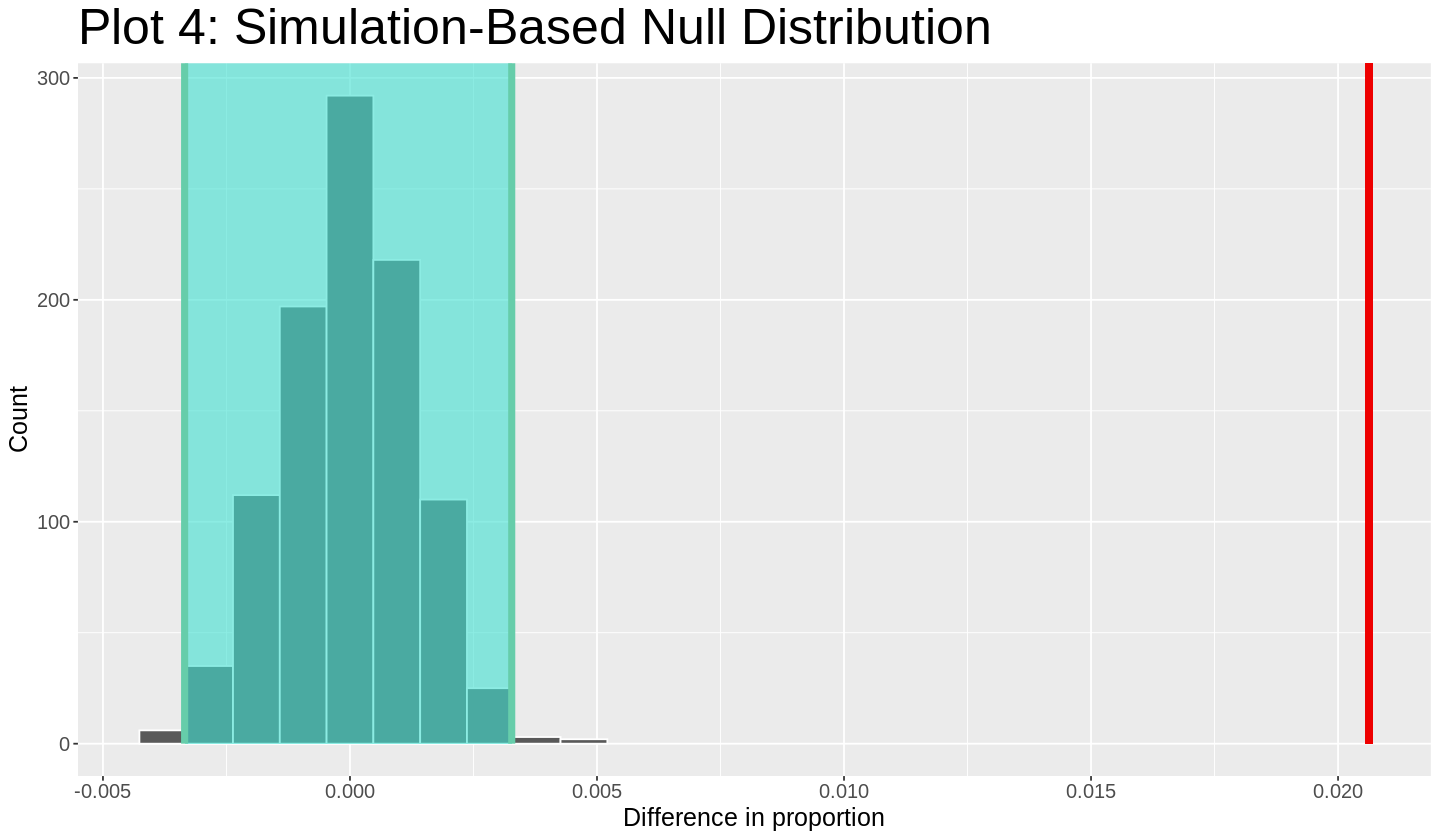

In [10]:
options(repr.plot.width = 12, repr.plot.height = 7)

confidence_interval = get_confidence_interval(crime_null_dist, level = 0.99)

crime_result_plot = visualize(crime_null_dist, bins = 10) + 
                    shade_confidence_interval(confidence_interval) +
                    shade_p_value(obs_stat = obs_diff_prop, direction = "greater") +
                    labs(title = "Plot 4: Simulation-Based Null Distribution", x = "Difference in proportion", y = "Count") +
                    theme(text=element_text(size=15),
                    plot.title=element_text(size=30),)

confidence_interval
crime_result_plot

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The p-value for our test statistic is so small that the program returns 0, meaning that there is virtually no possibility the observed difference can be explained by the natural variation of the proportion under the null model. With such a low p-value, we can reject the null hypothesis that the proportion of break and enters over total crimes in the period from 2015-19 is equal to the same proportion in 2020. 

In [11]:
p_value = crime_null_dist %>%
          get_p_value(obs_stat = obs_diff_prop, direction = "greater")

p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;To add robustness to our results, we performed a second test using a two sample test for proportions with the prop.test() function in R. This test confirmed our earlier results returning a p-value of 1.257e-57, which is well below the significance level of 0.01. Again, we can safely reject the null hypothesis with this test. 

In [12]:
prop_test = tidy(
              prop.test(
                x = c(crime_prop_2020$n[1], crime_prop_2015_to_2019$n[1]),
                n = c(crime_prop_2020$n[1] + crime_prop_2020$n[2], crime_prop_2015_to_2019$n[1] + crime_prop_2015_to_2019$n[2]),
                alternative = "g",
                correct = FALSE
              )
            )
cat("Table 7: Proportion test comparing Commerial Break and Enter Crimes in 2015-2019 with 2020")
prop_test

Table 7: Proportion test comparing Commerial Break and Enter Crimes in 2015-2019 with 2020

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.07440421,0.05377017,254.6521,1.256713e-57,1,0.01826821,1,2-sample test for equality of proportions without continuity correction,greater


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Comparing the results of the prop.test() function with the bootstrapping results, it is evident that there is more precision in the reported p-value with the prop.test() while the p-value calculated by the bootstrapping method is approximated. Thus, from these results, the prop.test() asymptotic function proves to be more trustworthy than the bootstrapping method due to its high-level of exactness. 

##Discussion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;While the total count of reported break-ins in 2020 does not appear to be abnormally high when we look at the yearly variation in counts, when we look at the proportion of break and enter reports over total reported crime, we do see a significant jump. It is important to note that overall crime reports dropped significantly in 2020, which means that other types of crimes dropped, while break and enters saw a slight uptick. In hindsight, the reports seen in the news media in the early days of the pandemic were more than just anecdotal. There is evidence to suggest this was a real phenomenon.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;These results can influence decisions made by businesses, local police forces and governments if Vancouver and other jurisdictions implement further lockdowns as the 4th wave of the pandemic gains steam. Should these results be sustained across every new round of lockdowns, the cost of security and insurance for businesses could increase. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;One thing to consider about these results is that they are limited to the City of Vancouver. To truly be able to generalize these results, similar analysis should be done in different provinces and even in rural communities. It is possible this is a phenomenon seen only in some major cities, but is not necessarily the case in suburban or rural communities. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Other socioeconomic factors could influence how crime is affected during the lockdowns. For example, the type of workforce and the industries the region relies on, the average income and inequality in the community or even the levels of social trust. A city or town that has more industrial, high tech or healthcare jobs that are not as affected by the lockdowns, for example, could see different results.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Further research can also be done with the other types of crime, allowing us to know how future pandemics may affect crime. This report looks specifically at commercial break and enters. But how were homicides, vehicle thefts, domestic violence and other crimes affected? As seen above, there was an overall drop in crimes, but did any other type of crime see an increase aside from commercial break and enters? This type of information can allow governments, police forces and companies to prepare for future pandemics.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;So while this is important data to take into account for making decisions about lockdows and business security, it cannot necessarily be generalized to every city and town across Canada. Further research should be conducted for different cities and different types of crime. 


##References

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fitzpatrick, M. (2020, April 22). Crime data During COVID-19 shows spike in business break-ins, stunt driving. CBC News. https://www.cbc.ca/news/canada/crime-data-during-covid-19-shows-spike-in-business-break-ins-stunt-driving-1.5539331.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;İmrohoroĝlu, A., Merlo, A., & Rupert, P. (2006). Understanding the determinants of crime. Journal of Economics and Finance, 30(2), 270–284. https://doi.org/10.1007/bf02761491

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Jeudy, L. (2021, July 6). Topic: Crime in Canada. Statista. https://www.statista.com/topics/2814/crime-in-canada/

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Statistics Canada, COVID-19 in Canada: A One-year Update on Social and Economic Impacts (2021). https://www150.statcan.gc.ca/n1/pub/11-631-x/11-631-x2021001-eng.htm#a5. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Vancouver Police Department. Vancouver Police Department Crime Database. https://geodash.vpd.ca/opendata/. 